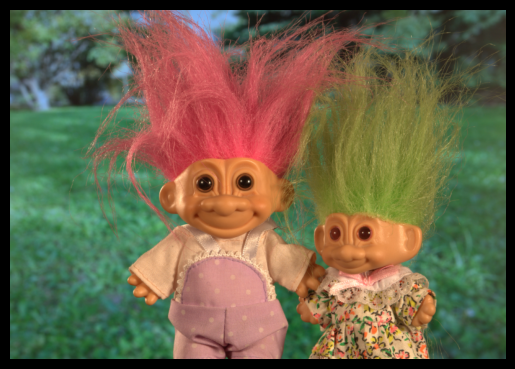

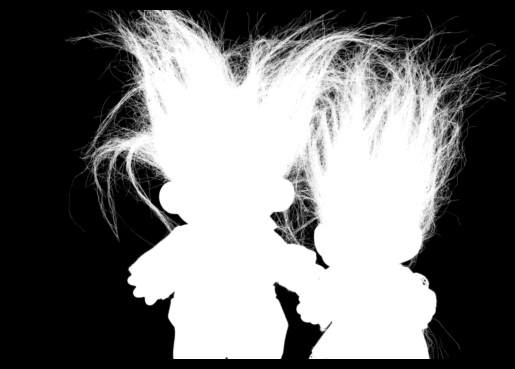

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

I = cv2.imread('GT04_Real.png')                                         # load image I (BGR format)
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)/255                         # convert to RGB and normalize
plt.imshow(I), plt.axis('off')                                     # plot I
plt.show();
alpha_ex = cv2.imread('GT04.png', cv2.IMREAD_GRAYSCALE)/255  # load exact alpha and normalize
plt.imshow(alpha_ex, cmap='gray'), plt.axis('off')                 # plot alpha
plt.show();

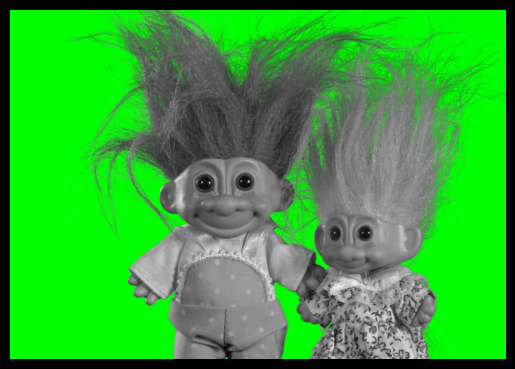

In [5]:
n_rows = I.shape[0]                              # number of rows in I
n_cols = I.shape[1]                              # number of columns in I
n_pixels = n_rows * n_cols                       # number of pixels in I
I = np.reshape(I, (n_pixels, 3))
I[:, 0] = I[:, 1]                                # red = green
I[:, 2] = I[:, 1]                                # blue = green
alpha_ex = np.reshape(alpha_ex, (n_pixels, 1))   
G_B = 1                                          # green screen value 
I = alpha_ex * I + (1 - alpha_ex) * [0, G_B, 0]  # replace background with green screen
I = np.reshape(I, (n_rows, n_cols, 3))
plt.imshow(I), plt.axis('off')                   # plot I
plt.show(); 

In [6]:
R_I = I[:, :, 0]  # red component of I
G_I = I[:, :, 1]  # green component of I 
B_I = I[:, :, 2]  # blue component of I

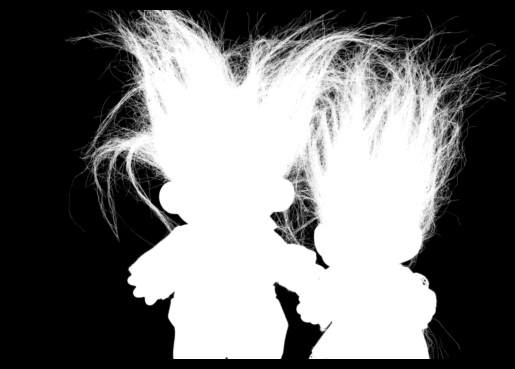

In [7]:
alpha = (R_I - (G_I - G_B))/G_B                  # compute alpha with formula
plt.imshow(alpha, cmap='gray'), plt.axis('off')  # plot alpha
plt.show();

In [8]:
alpha = np.reshape(alpha, (n_pixels, 1))  
error = np.linalg.norm(alpha - alpha_ex)/np.linalg.norm(alpha_ex)
print(f'Error (alpha): {error:.2e}')

Error (alpha): 3.63e-17


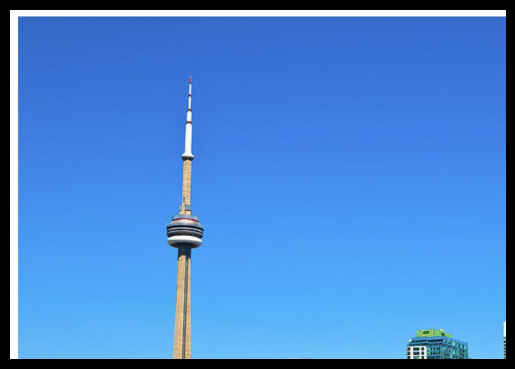

In [33]:
K = cv2.imread('toronto.jpg')                # load image (BGR format)
K = cv2.cvtColor(K, cv2.COLOR_BGR2RGB)/255   # convert to RGB and normalize
K = K[:n_rows, :n_cols, :]                   # adjust size of K to size of I
plt.imshow(K), plt.axis('off')               # plot K
plt.show();
K = np.reshape(K, (n_pixels, 3))

In [35]:
height,witdh = K.shape
print(height)
print(witdh)

450400
3


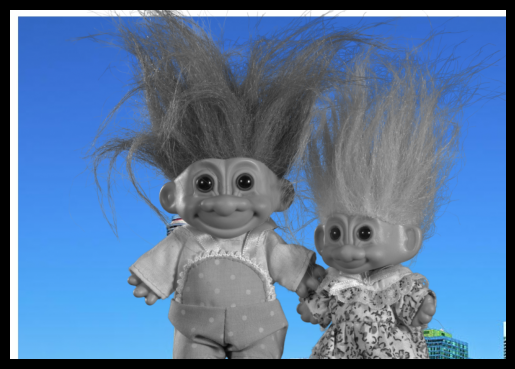

In [36]:
R_I = np.reshape(R_I, (n_pixels, 1))
J = np.tile(R_I, 3) + (1 - alpha) * K   # new image J with different background K
J = np.reshape(J, (n_rows, n_cols, 3))               
plt.imshow(J), plt.axis('off')          # plot J 
plt.show();